# Predicting loan status

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test.shape

(367, 12)

In [5]:
df_Answer=df_test['Loan_ID']
df_Answer.to_csv('Result.csv')
df_Answer.to_csv('Result.csv',index=False)#removing index
df_Answer=pd.read_csv('Result.csv')
df_Answer.head(2)

,Loan_ID
0,LP001015
1,LP001022


In [6]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_train.shape

(614, 13)

# Checking null values

In [8]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df_train['Gender'].fillna(value='Male',inplace=True)


In [12]:
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [13]:
df_test['Gender'].fillna(value='Male',inplace=True)

In [14]:
df_train.dropna(subset=['Married'],inplace=True)


In [15]:
df_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [16]:
df_test['Married'].fillna(value='Y',inplace=True)

In [17]:
df_train['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df_train['Dependents'].fillna(value=0,inplace=True)

In [19]:
df_test['Dependents'].value_counts()


0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [20]:
df_test['Dependents'].fillna(value=0,inplace=True)

In [21]:
df_train["Dependents"].replace({"3+": "3"},inplace=True)
df_test["Dependents"].replace({"3+": "3"},inplace=True)

In [22]:
df_train['Self_Employed'].value_counts()


No     497
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
df_train['Self_Employed'].fillna(value='No',inplace=True)


In [24]:
df_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [25]:
df_test['Self_Employed'].fillna(value='No',inplace=True)

In [26]:
valueMean=df_train['LoanAmount'].mean()
print(valueMean)
df_train['LoanAmount'].fillna(value=valueMean,inplace=True)

testvalueMean=df_test['LoanAmount'].mean()
print(testvalueMean)
df_test['LoanAmount'].fillna(value=testvalueMean,inplace=True)

146.36949152542374
136.13259668508286


In [27]:
valueMean=df_train['Loan_Amount_Term'].mean()
print(valueMean)
df_train['Loan_Amount_Term'].fillna(value=valueMean,inplace=True)

testvalueMean=df_test['Loan_Amount_Term'].mean()
print(testvalueMean)
df_test['Loan_Amount_Term'].fillna(value=testvalueMean,inplace=True)

341.90954773869345
342.53739612188366


In [28]:
df_train['Credit_History'].value_counts()


1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [29]:
df_train['Credit_History'].fillna(value=1.0,inplace=True)


In [30]:
df_test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [31]:
df_test['Credit_History'].fillna(value=1.0,inplace=True)

In [32]:
df_train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    object 
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 66.8+ KB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [36]:

df_train['Dependents'] = pd.to_numeric(df_train['Dependents'])

df_test['Dependents'] = pd.to_numeric(df_test['Dependents'])

In [37]:
df_train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.369492,360.0,1.0,Urban,Y


In [38]:
df_test.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


# Graphs

The percentage of Y class : 0.69
The percentage of N class : 0.31


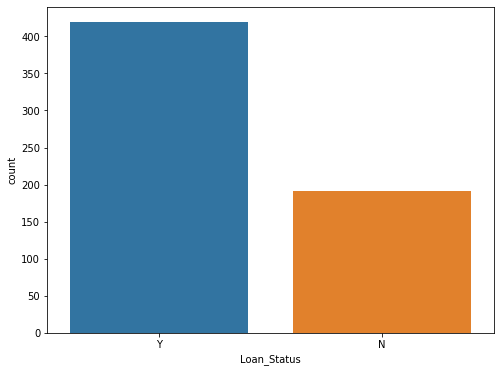

In [48]:

# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df_train['Loan_Status']);


print('The percentage of Y class : %.2f' % (df_train['Loan_Status'].value_counts()[0] / len(df_train)))
print('The percentage of N class : %.2f' % (df_train['Loan_Status'].value_counts()[1] / len(df_train)))


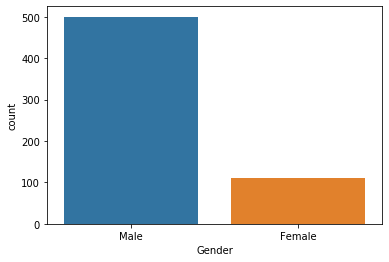

In [40]:
sns.countplot(df_train['Gender'])

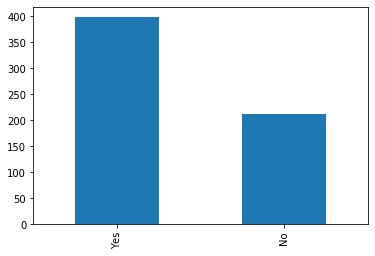

In [41]:
df_train['Married'].value_counts().plot(kind='bar')

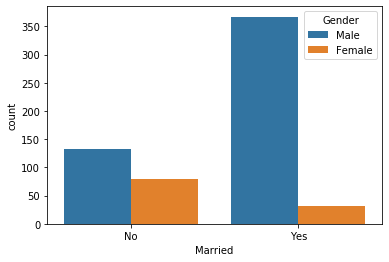

In [42]:
sns.countplot(df_train['Married'],hue=df_train['Gender'])

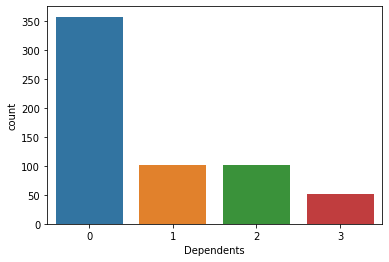

In [43]:
sns.countplot(df_train['Dependents'])

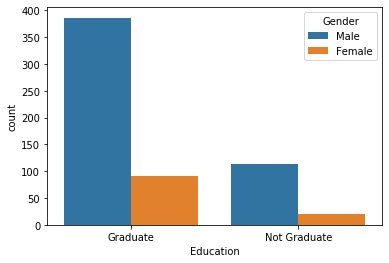

In [45]:
sns.countplot(df_train['Education'],hue=df_train['Gender'])

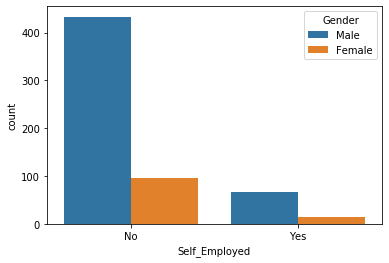

In [46]:
sns.countplot(df_train['Self_Employed'],hue=df_train['Gender'])

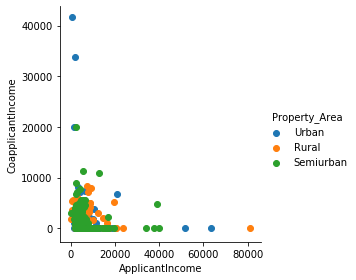

In [51]:
# x-axis: ApplicationIncome, y_axis: CoapplicantIncome and representing in terms of Property_Section

sns.FacetGrid(df_train,hue="Property_Area",size=4) \
.map(plt.scatter,"ApplicantIncome","CoapplicantIncome") \
.add_legend()
plt.show()


Text(0, 0.5, 'Count')

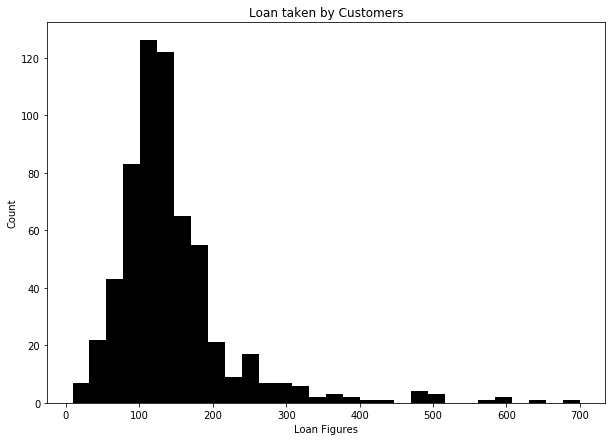

In [52]:
# Using HISTOGRAM REPRESENTATION
# x-axis: loan figures, y_axis: count, Title: Loan taken by Customers

plt.figure(figsize = (10,7)) 
x = df_train["LoanAmount"] 
plt.hist(x, bins = 30, color = "black") 
plt.title("Loan taken by Customers") 
plt.xlabel("Loan Figures") 
plt.ylabel("Count")


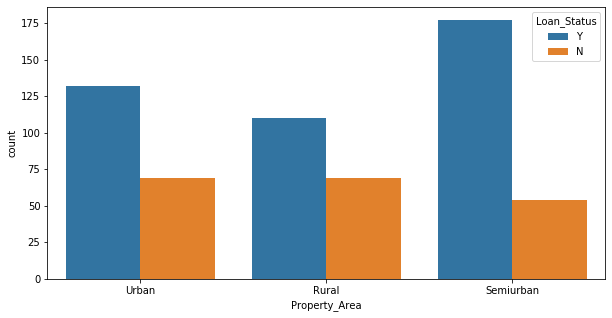

In [53]:
# Property_Area

plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df_train);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature


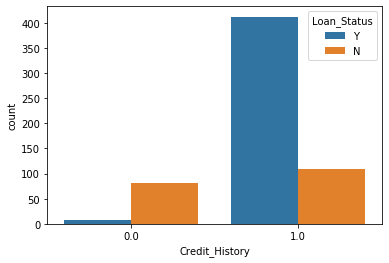

In [55]:
sns.countplot(df_train['Credit_History'],hue=df_train['Loan_Status'])

# Handling Categorigal Columns

In [59]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Married  = LabelEncoder()
le_Education = LabelEncoder()
le_Self_Employed = LabelEncoder()
le_Property_Area = LabelEncoder()
le_Loan_Status   = LabelEncoder()

In [60]:
df_train['gender_n'] = le_Gender.fit_transform(df_train['Gender'])
df_train['Married_n'] = le_Married.fit_transform(df_train['Married'])
df_train['Education_n'] = le_Education.fit_transform(df_train['Education'])
df_train['SelfEmployed_n'] =le_Self_Employed.fit_transform(df_train['Self_Employed'])
df_train['PropertyArea_n'] = le_Property_Area.fit_transform(df_train['Property_Area'])
df_train['LoanStatus_n'] = le_Loan_Status.fit_transform(df_train['Loan_Status'])


df_test['gender_n'] = le_Gender.fit_transform(df_test['Gender'])
df_test['Married_n'] = le_Married.fit_transform(df_test['Married'])
df_test['Education_n'] = le_Education.fit_transform(df_test['Education'])
df_test['SelfEmployed_n'] =le_Self_Employed.fit_transform(df_test['Self_Employed'])
df_test['PropertyArea_n'] = le_Property_Area.fit_transform(df_test['Property_Area'])
#df_test['LoanStatus_n'] = le_Loan_Status.fit_transform(df_test['Loan_Status'])


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 613
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            611 non-null    object 
 1   Gender             611 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         611 non-null    int64  
 4   Education          611 non-null    object 
 5   Self_Employed      611 non-null    object 
 6   ApplicantIncome    611 non-null    int64  
 7   CoapplicantIncome  611 non-null    float64
 8   LoanAmount         611 non-null    float64
 9   Loan_Amount_Term   611 non-null    float64
 10  Credit_History     611 non-null    float64
 11  Property_Area      611 non-null    object 
 12  Loan_Status        611 non-null    object 
 13  gender_n           611 non-null    int32  
 14  Married_n          611 non-null    int32  
 15  Education_n        611 non-null    int32  
 16  SelfEmployed_n     611 non

In [62]:
column_values = df_train[["Loan_Status", "LoanStatus_n"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Y' 1 'N' 0]


In [63]:
df_train=df_train.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis='columns')
df_test=df_test.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],axis='columns')



In [64]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])

df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [65]:
df_train=df_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis='columns')

df_test=df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis='columns')

In [66]:
df_train.head(1)

,Dependents,Loan_Amount_Term,Credit_History,gender_n,Married_n,Education_n,SelfEmployed_n,PropertyArea_n,LoanStatus_n,TotalIncome,LoanAmount_log
0,0,360.0,1.0,1,0,0,0,2,1,5849.0,4.986134


In [67]:
df_test.head(1)

,Dependents,Loan_Amount_Term,Credit_History,gender_n,Married_n,Education_n,SelfEmployed_n,PropertyArea_n,TotalIncome,LoanAmount_log
0,0,360.0,1.0,1,1,0,0,2,5720,4.70048


# Correlation Matrix

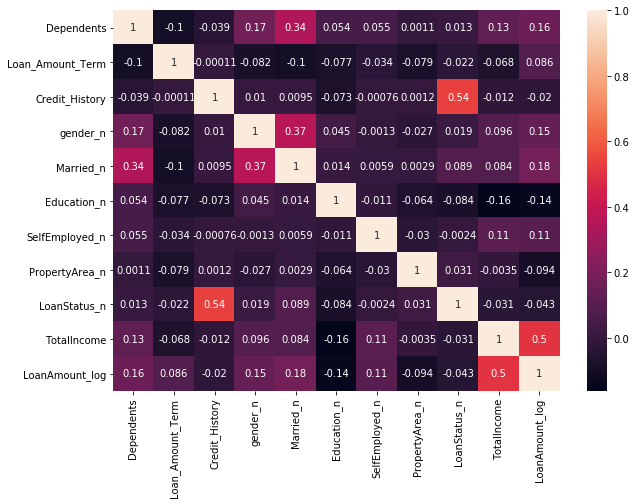

In [68]:
corrMatrix=df_train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [69]:
inputs=df_train.drop(['LoanStatus_n'],axis='columns')
target=df_train['LoanStatus_n']

In [70]:
inputs.head(1)

,Dependents,Loan_Amount_Term,Credit_History,gender_n,Married_n,Education_n,SelfEmployed_n,PropertyArea_n,TotalIncome,LoanAmount_log
0,0,360.0,1.0,1,0,0,0,2,5849.0,4.986134


In [71]:
target.head(5)

0    1
1    0
2    1
3    1
4    1
Name: LoanStatus_n, dtype: int32

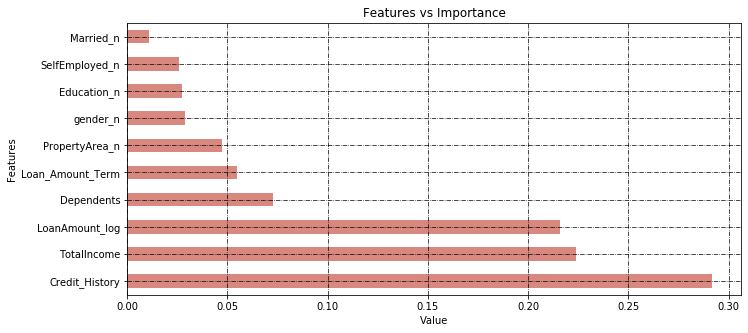

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(inputs,target)
#print(model.feature_importances_) #use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=inputs.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
# Draw grid lines with red color and dashed style
plt.grid()

feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

# Model

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=0)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\vj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
model.score(X_test,y_test)


0.8130081300813008

In [77]:
S=model.predict(df_test)
print(S)
df_test.shape

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


(367, 10)

In [78]:
df_Answer['Loan_Status']=S

In [79]:
df_Answer["Loan_Status"].replace({1: "Y",0:"N"},inplace=True)

In [80]:
#Result dataset
df_Answer.to_csv('Result.csv')
df_Answer.to_csv('Result.csv',index=False)#removing index
df_Answer=pd.read_csv('Result.csv')
df_Answer.head(5)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
